In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

In [24]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [58]:
#포스코

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


df = fdr.DataReader('005490', '2018-01-01', '2023-01-01')
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()

#며칠데이터로 예측
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
    
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])

validation_data = (val_X,val_y)

model2 = Sequential()


forward_layer = LSTM(64, return_sequences=True)
backward_layer = LSTM(64, activation='relu', return_sequences=True,
                      go_backwards=True)

model2.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                        input_shape=(10, 4)))

model2.add(Dropout(0.2))

model2.add(Bidirectional(LSTM(64)))

model2.add(Dropout(0.2))

model2.add(Dense(units=1))


model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 10, 128)          35328     
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 10, 128)           0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 134,273
Trainable params: 134,273
Non-tr

In [59]:
model2.compile(optimizer='adam', 
              loss='mean_squared_error')
model2.fit(train_X, 
          train_y, 
          epochs=100, 
          batch_size=30,
          validation_data=validation_data
         )



pred_y = model2.predict(test_X)

Epoch 1/100
29/29 [==============================] - 8s 62ms/step - loss: 0.0280 - val_loss: 0.0047
Epoch 2/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 3/100
29/29 [==============================] - 1s 17ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 4/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 5/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 6/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 7/100
29/29 [==============================] - 1s 17ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 8/100
29/29 [==============================] - 1s 17ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 9/100
29/29 [==============================] - 1s 20ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 10/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0026 - val_loss: 0.0021

29/29 [==============================] - 1s 17ms/step - loss: 0.0011 - val_loss: 8.8987e-04
Epoch 82/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 83/100
29/29 [==============================] - 1s 20ms/step - loss: 0.0014 - val_loss: 8.9232e-04
Epoch 84/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 85/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 8.4606e-04
Epoch 86/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 8.2614e-04
Epoch 87/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0012 - val_loss: 8.4783e-04
Epoch 88/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 8.1629e-04
Epoch 89/100
29/29 [==============================] - 1s 17ms/step - loss: 0.0012 - val_loss: 8.2401e-04
Epoch 90/100
29/29 [==============================] - 0s 17ms/step - loss: 0

4/4 [==============================] - 0s 5ms/step


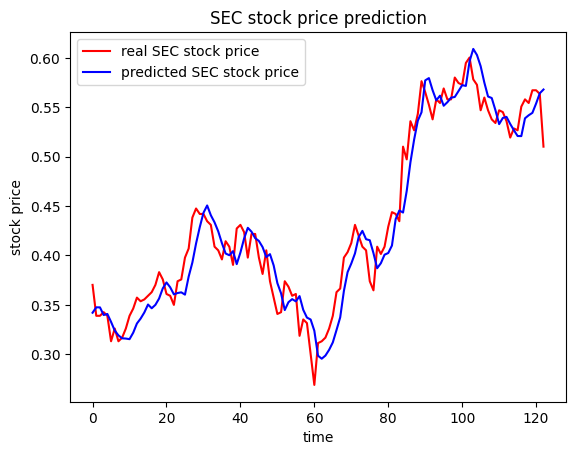

In [60]:
pred_y = model2.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [61]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))

print("RMSE :", RMSE(test_y, pred_y))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, pred_y)
print("R2 :", f2_y_predict)

RMSE : 0.022764856881301098
R2 : 0.9346082565322082


In [29]:
df = fdr.DataReader('005490', '2018-01-01', '2023-09-07')
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()

#며칠데이터로 예측
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
now_X = np.array(data_X)
now_y = np.array(data_y)

In [30]:
len(pred_y)

123

4/4 [==============================] - 0s 5ms/step


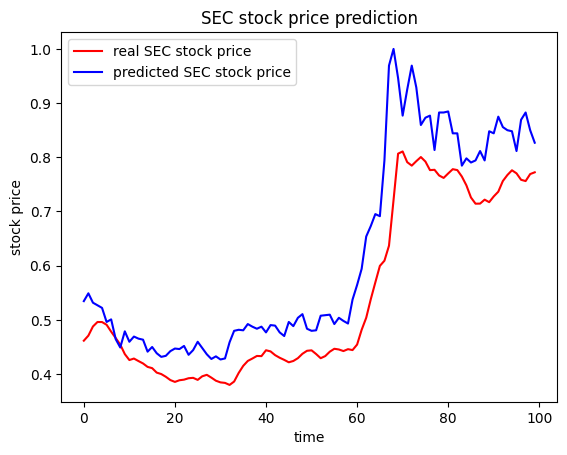

In [34]:
pred_y = model2.predict(now_X[-100:])


plt.figure()
plt.plot(pred_y[-100:], color='red', label='real SEC stock price')
plt.plot(now_y[-100:], color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [35]:
len(now_y)

1393

In [36]:
len(y_predict)

NameError: name 'y_predict' is not defined

In [37]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(now_y[-100:], pred_y[-100:]))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(now_y[-100:], pred_y[-100:])
print("R2 :", f2_y_predict)

RMSE : 0.08905573219975906
R2 : 0.7668051504160874


In [ ]:
now_pred_y = model2.predict(now_X)

In [64]:
df.Close[-1] * pred_y[-1] / dfy.Close[-1]

array([307861.24666773])

In [63]:
df.Close[-1] * now_y[-1] / dfy.Close[-1]

array([448208.72674265])

In [44]:
train_X=train_X.reshape(855,40)

In [47]:
train_X.shape

(855, 40)

In [45]:
import xgboost as xgb

In [46]:
my_model = xgb.XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=100)


my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

(855, 10, 4)

In [49]:
my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
test_X.shape

(123, 10, 4)

In [53]:
test_X=test_X.reshape(123,40)

In [54]:
y_pred = my_model.predict(test_X) 

In [57]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(test_y, y_pred))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, y_pred)
print("R2 :", f2_y_predict)

RMSE : 0.02312438468777363
R2 : 0.932526468857052


In [9]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


df = fdr.DataReader('035420', '2018-01-01', '2023-01-01') #네이버
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()

#며칠데이터로 예측
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
    
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])

validation_data = (val_X,val_y)

model2 = Sequential()


forward_layer = LSTM(64, return_sequences=True)
backward_layer = LSTM(64, activation='relu', return_sequences=True,
                      go_backwards=True)

model2.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                        input_shape=(10, 4)))

model2.add(Dropout(0.2))

model2.add(Bidirectional(LSTM(64)))

model2.add(Dropout(0.2))

model2.add(Dense(units=1))


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 10, 128)          35328     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 10, 128)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 134,273
Trainable params: 134,273
Non-tr

In [10]:
model2.compile(optimizer='adam', 
              loss='mean_squared_error')
model2.fit(train_X, 
          train_y, 
          epochs=100, 
          batch_size=30,
          validation_data=validation_data
         )



pred_y = model2.predict(test_X)

Epoch 1/100
29/29 [==============================] - 7s 67ms/step - loss: 0.0245 - val_loss: 0.0055
Epoch 2/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0033 - val_loss: 0.0049
Epoch 3/100
29/29 [==============================] - 1s 20ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 4/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 5/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 6/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 7/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0021 - val_loss: 0.0039
Epoch 8/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 9/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0015 - val_loss: 0.0026

29/29 [==============================] - 1s 19ms/step - loss: 9.7207e-04 - val_loss: 0.0014
Epoch 81/100
29/29 [==============================] - 1s 17ms/step - loss: 8.1705e-04 - val_loss: 0.0017
Epoch 82/100
29/29 [==============================] - 1s 18ms/step - loss: 8.6777e-04 - val_loss: 0.0014
Epoch 83/100
29/29 [==============================] - 1s 18ms/step - loss: 7.3409e-04 - val_loss: 0.0011
Epoch 84/100
29/29 [==============================] - 0s 16ms/step - loss: 6.4666e-04 - val_loss: 0.0010
Epoch 85/100
29/29 [==============================] - 0s 16ms/step - loss: 6.9289e-04 - val_loss: 0.0011
Epoch 86/100
29/29 [==============================] - 0s 16ms/step - loss: 7.4727e-04 - val_loss: 0.0011
Epoch 87/100
29/29 [==============================] - 1s 18ms/step - loss: 7.7006e-04 - val_loss: 0.0011
Epoch 88/100
29/29 [==============================] - 0s 16ms/step - loss: 7.7839e-04 - val_loss: 0.0019
Epoch 89/100
29/29 [==============================] - 0s 16ms/step -

4/4 [==============================] - 0s 5ms/step


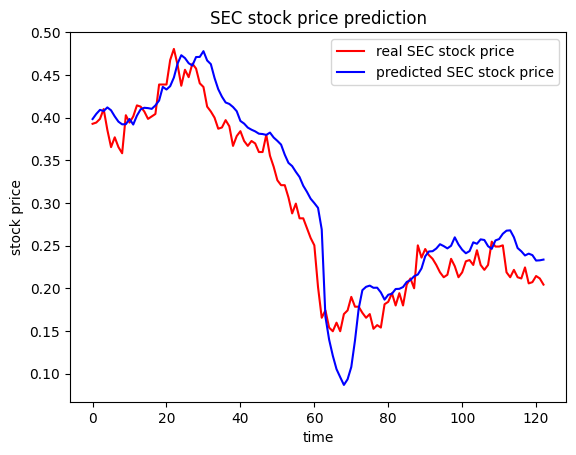

In [11]:
pred_y = model2.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [13]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(test_y, pred_y))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, pred_y)
print("R2 :", f2_y_predict)

RMSE : 0.033645458227724134
R2 : 0.8846264021275431


In [14]:
df = fdr.DataReader('035420', '2018-01-01', '2023-09-07')
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx=dfx.reset_index()
dfx=dfx.set_index(keys='Date')


X = dfx.values.tolist()
y = dfy.values.tolist()

#며칠데이터로 예측
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)
    
now_X = np.array(data_X)
now_y = np.array(data_y)

2/2 [==============================] - 0s 6ms/step


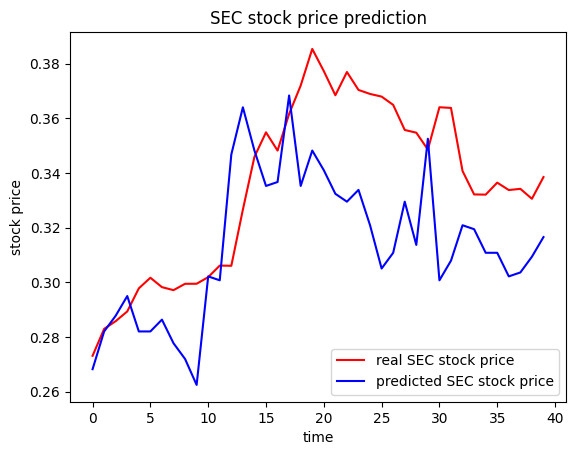

In [22]:
pred_y = model2.predict(now_X[-40:])


plt.figure()
plt.plot(pred_y[-40:], color='red', label='real SEC stock price')
plt.plot(now_y[-40:], color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [23]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(now_y[-40:], pred_y[-40:]))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(now_y[-40:], pred_y[-40:])
print("R2 :", f2_y_predict)

RMSE : 0.031297959803421226
R2 : -0.4259588496602422
